# Tarea Semanal 6

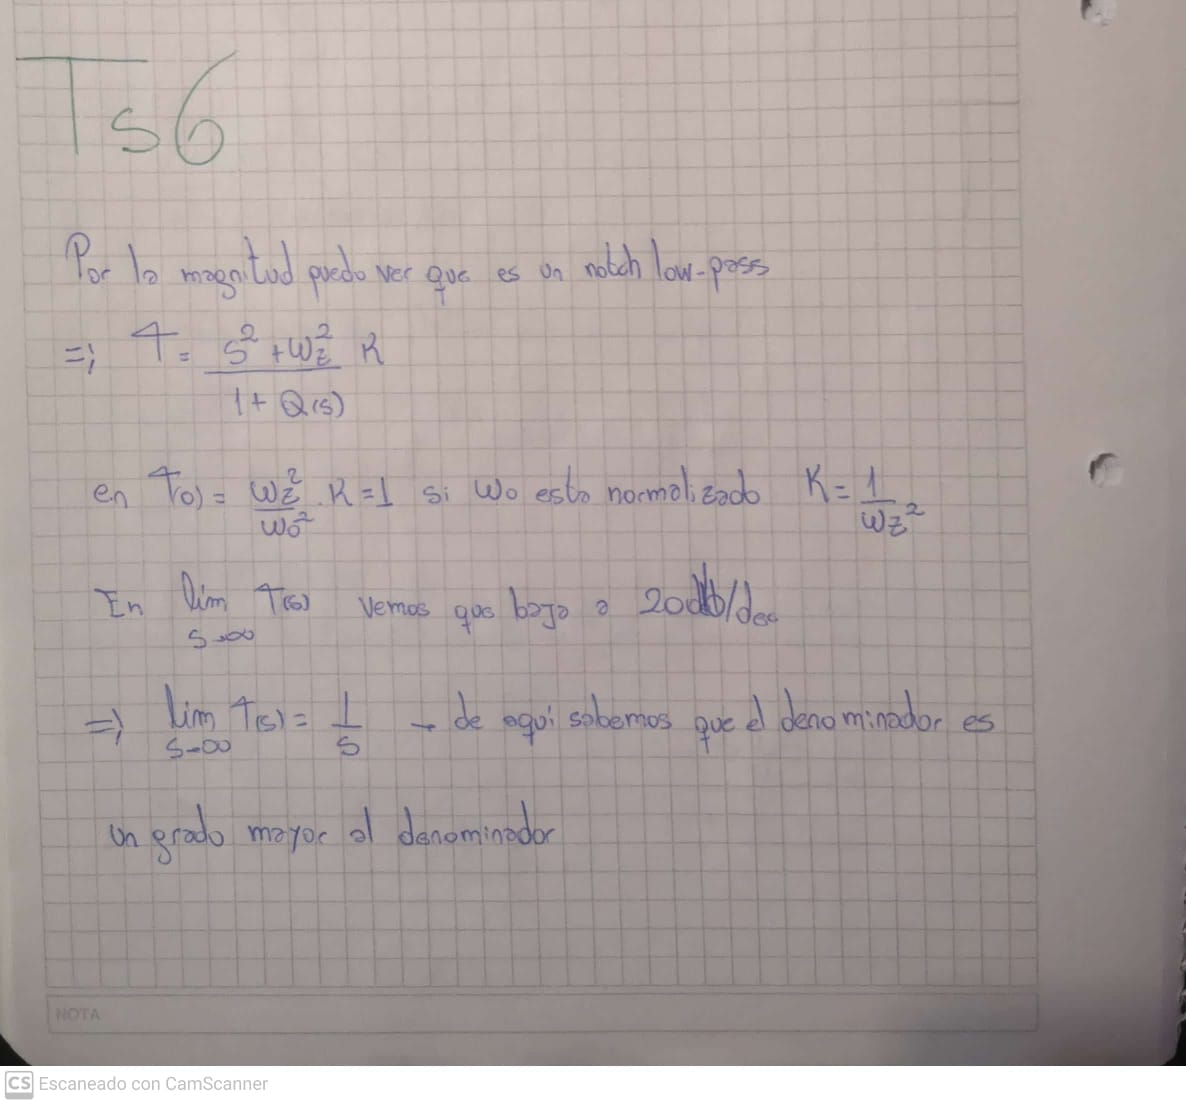
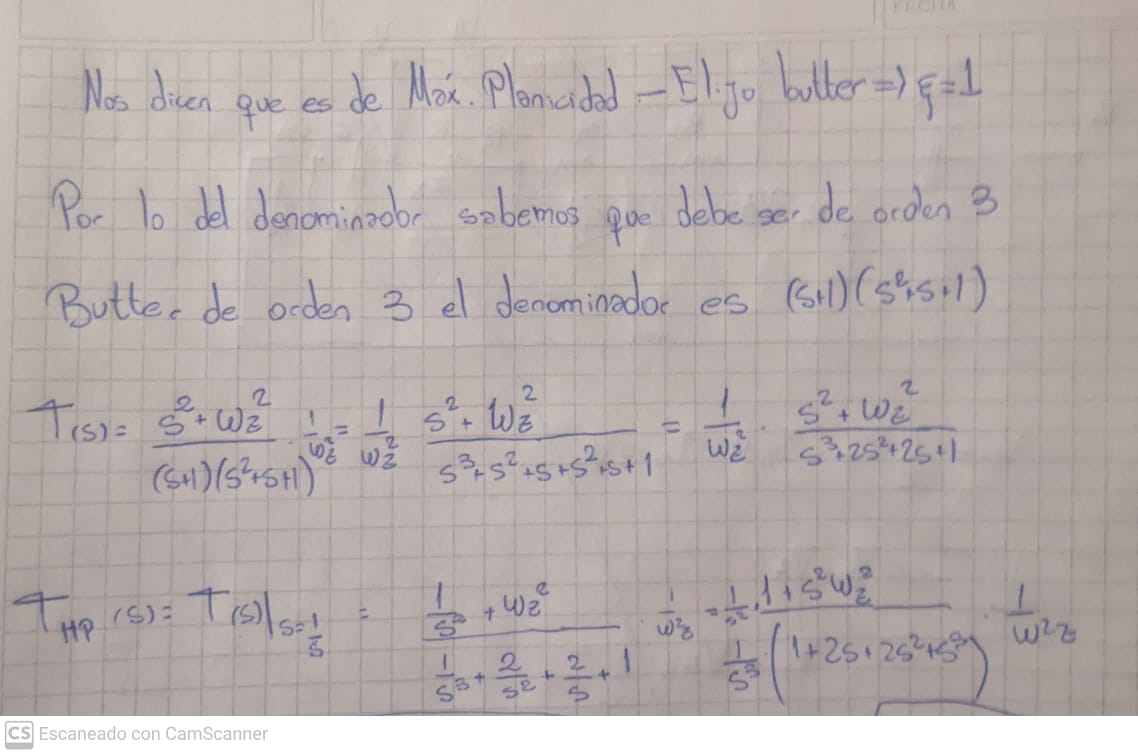
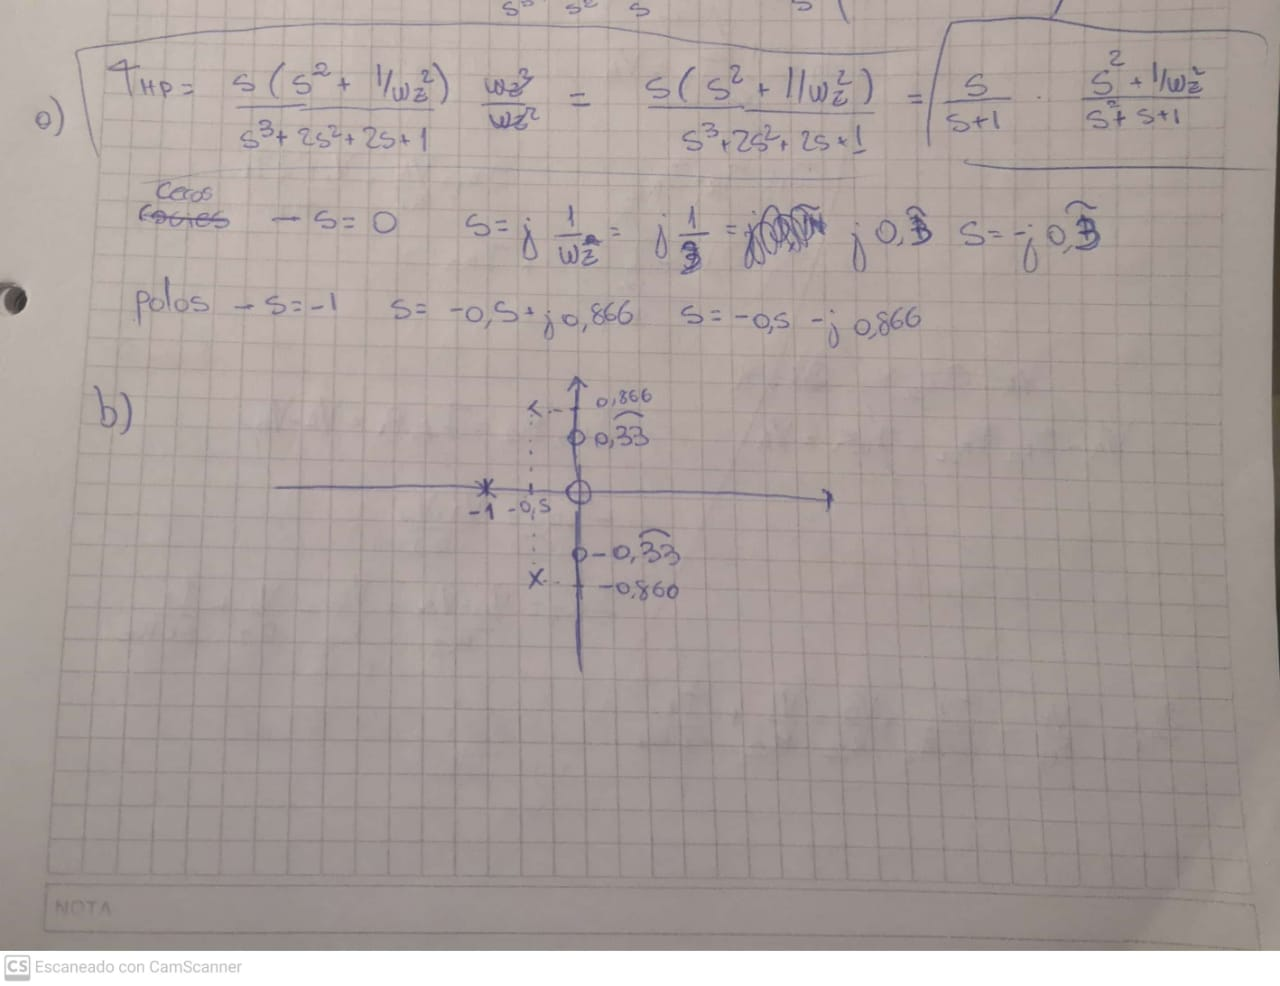

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  7 16:49:17 2022

@author: pedro
"""

import numpy as np
import scipy.signal as sig
import splane as tc2
import matplotlib.pyplot as plt

wz = 3

num_pb = [1/wz**2,0,1]

den_pb = [1,2,2,1]

print('Transferencia pasabajo prototipo')
print('--------------------------------')
tc2.pretty_print_lti(num_pb, den_pb)

Transferencia pasabajo prototipo
--------------------------------


<IPython.core.display.Math object>

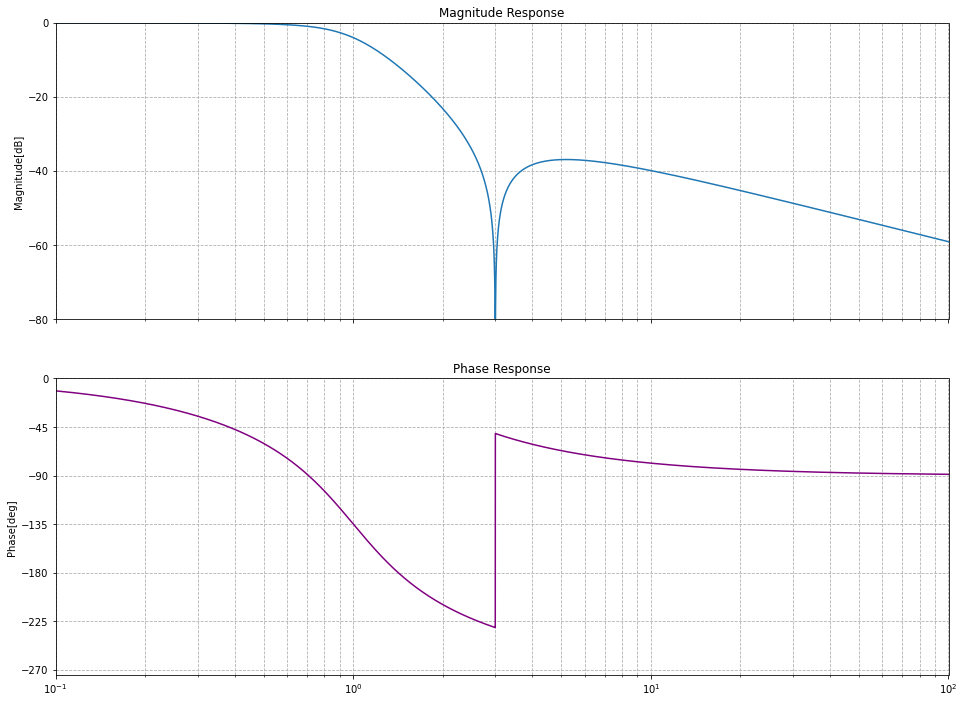

In [5]:
#chequeo los graficos

num1 = [1/wz**2,0, 1]
num2 = [0.0000000001,1] #asi no me molesta el jupyter
den1 = [1, 1, 1]
den2 = [1, 1]

den = np.convolve(den1,den2)
num = np.convolve(num1,num2)

sys = sig.TransferFunction(num, den)

# vector de frencuencia logaritmado
f = np.logspace(-1, 2,10000)

# obtengo la magnitud y fase de las transferencias
w, mag, phase = sig.bode(sys,f)

fig, (ax1,ax2) = plt.subplots(nrows=2 , ncols=1, sharex=True)
fig.set_size_inches(16,12)
#MODULO
ax1.semilogx(w,mag)
ax1.grid(True, which="both", ls="--")
ax1.set_title('Magnitude Response')
ax1.set_ylabel('Magnitude[dB]')
ax1.set_yticks([-80,-60,-40,-20,0])
ax1.set_ylim([-80,0])
ax1.autoscale(enable=True, axis='x', tight=True)

# FASE
ax2.semilogx(w, phase,color='purple')
ax2.grid(True, which="both", ls="--")
ax2.set_title('Phase Response')
ax2.set_ylabel('Phase[deg]')
ax2.set_yticks([-270,-225,-180,-135,-90,-45,0])
ax2.set_ylim([-275,0])
ax2.autoscale(enable=True, axis='x', tight=True)

Ahora vemos la simulacion numerica del pasaje a pasaaltos y el calculo de polos y ceros

In [11]:
num_hp,den_hp= sig.lp2hp(num_pb, den_pb)

tc2.pretty_print_lti(num_hp, den_hp)

<IPython.core.display.Math object>

In [12]:
#particiono
sos_hp = tc2.tf2sos_analog(num_hp, den_hp)
tc2.pretty_print_SOS(sos_hp)

<IPython.core.display.Math object>

In [13]:

roots = np.roots(den_hp)
print(f'roots: {roots}')

roots: [-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]


In [14]:
roots = np.roots(num_hp)
print(f'roots: {roots}')

roots: [-0.+0.33333333j  0.-0.33333333j  0.+0.j        ]


Paso a la implementacion circuital. El circuito que utilizaremos es 

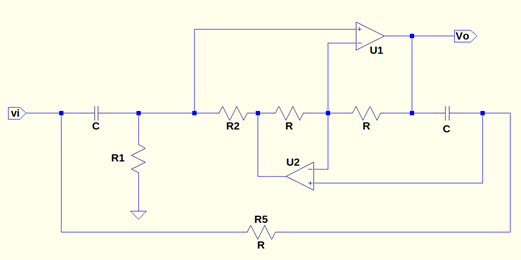

Analizo la transferencia de este circuito

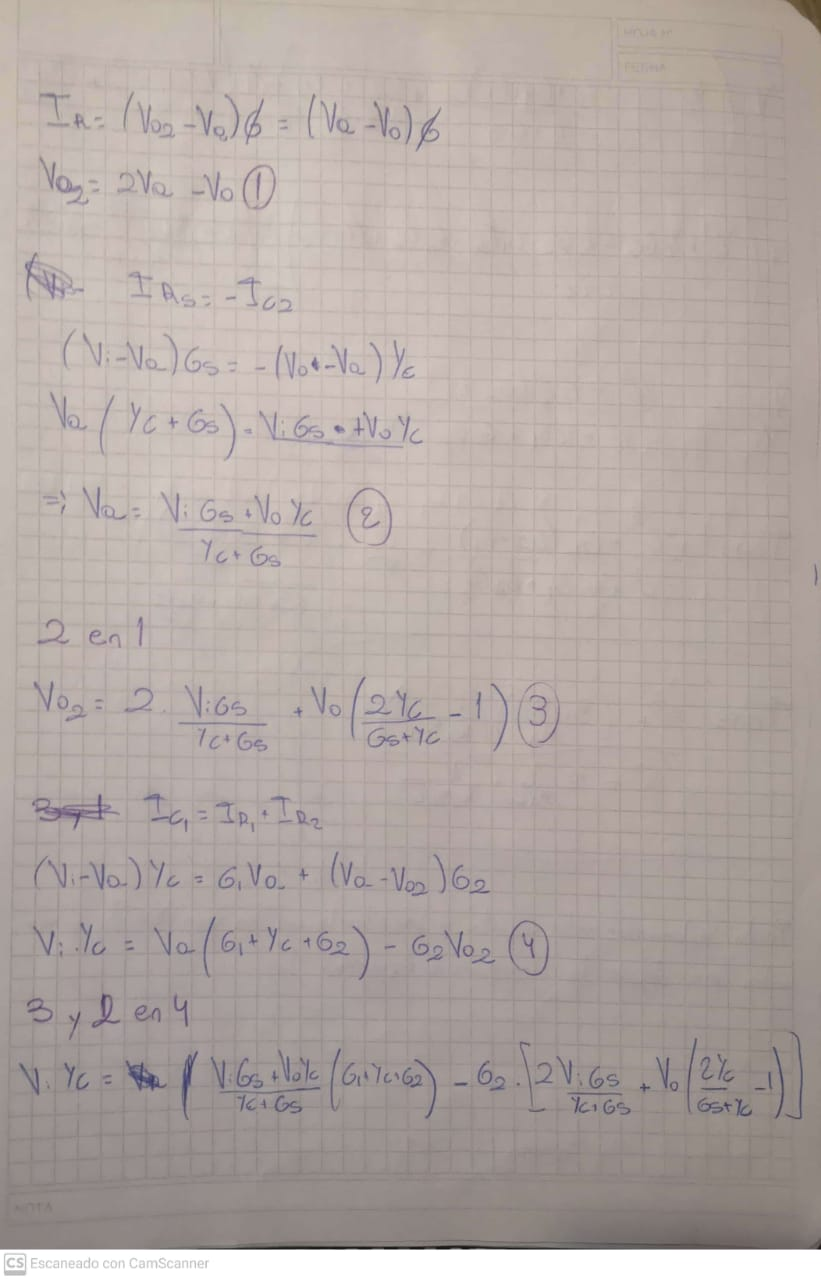
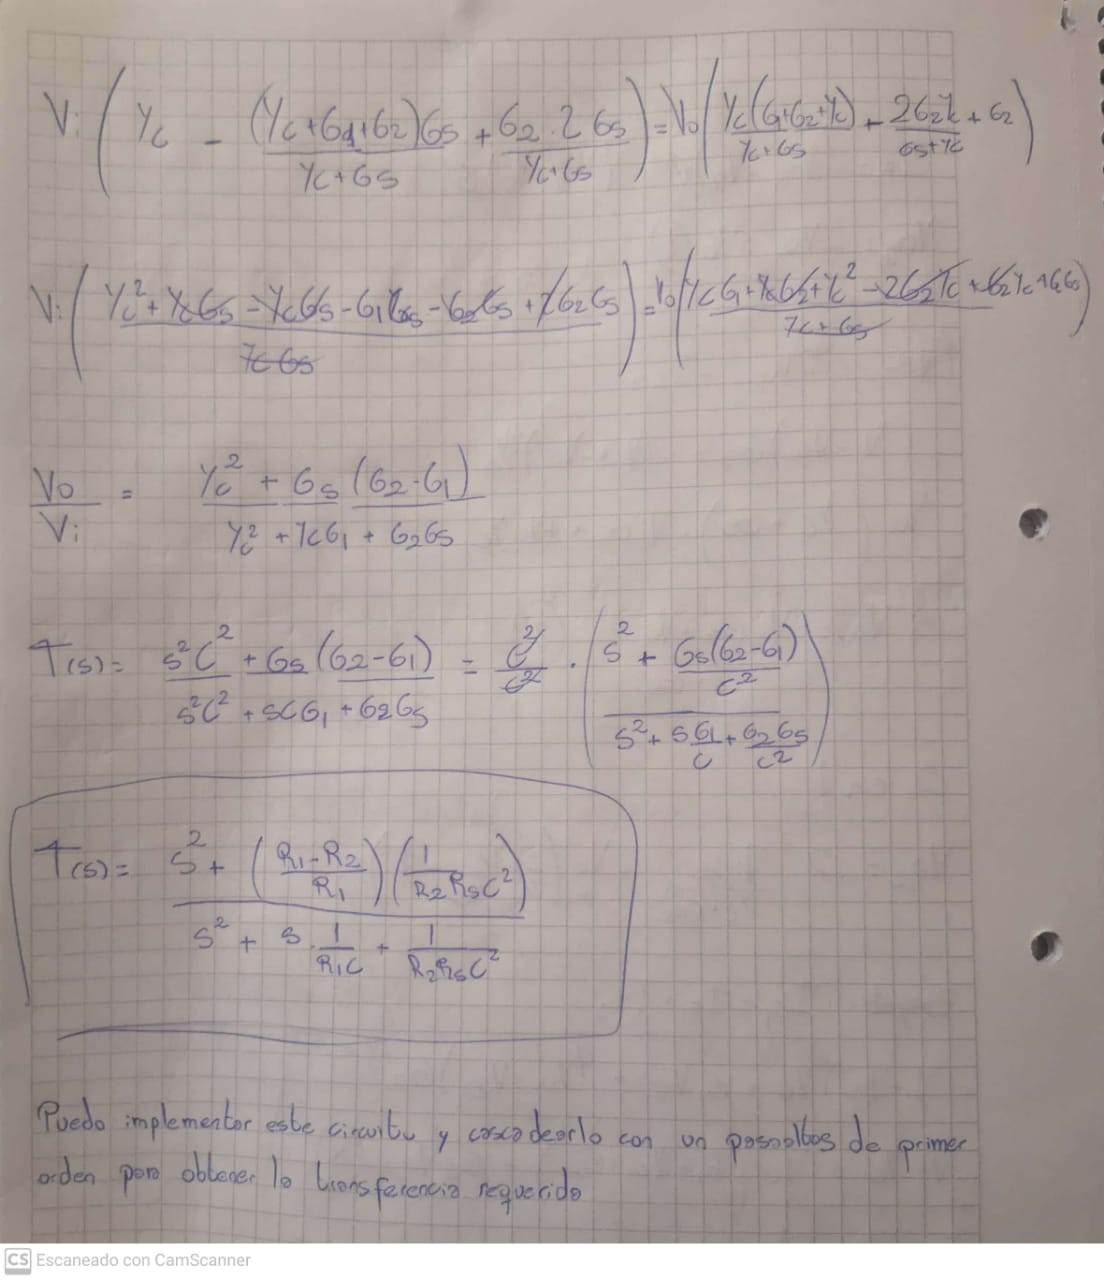

Ahora paso al diseño
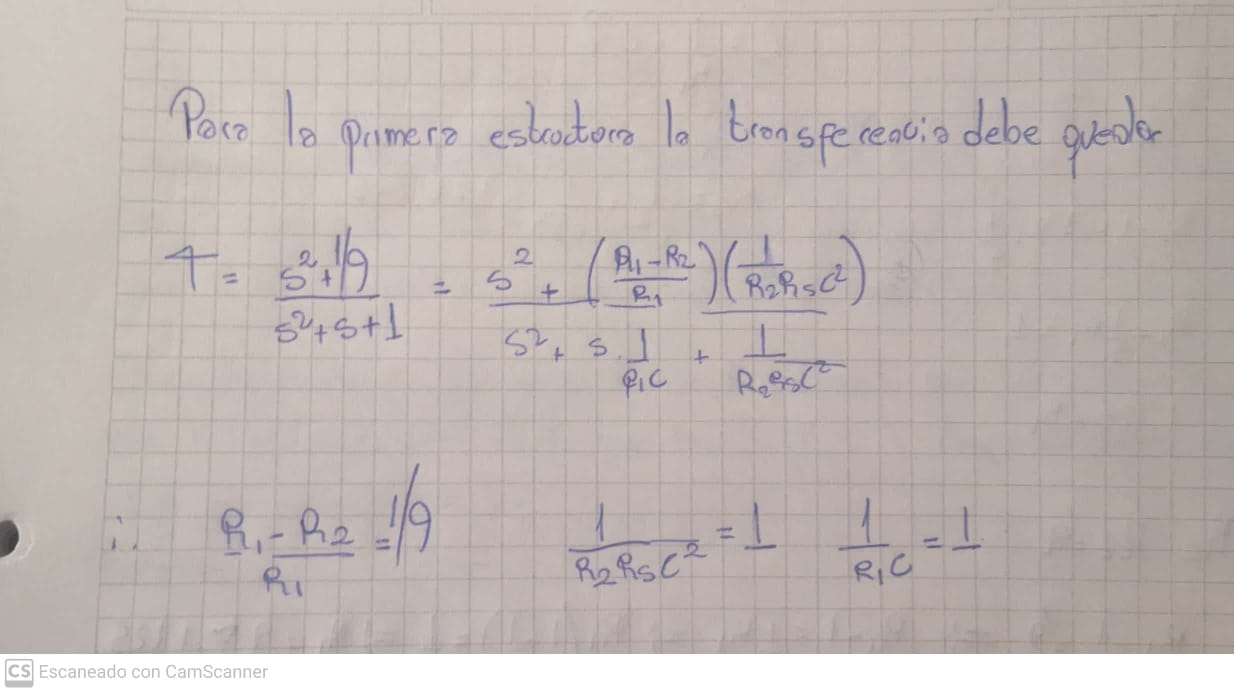
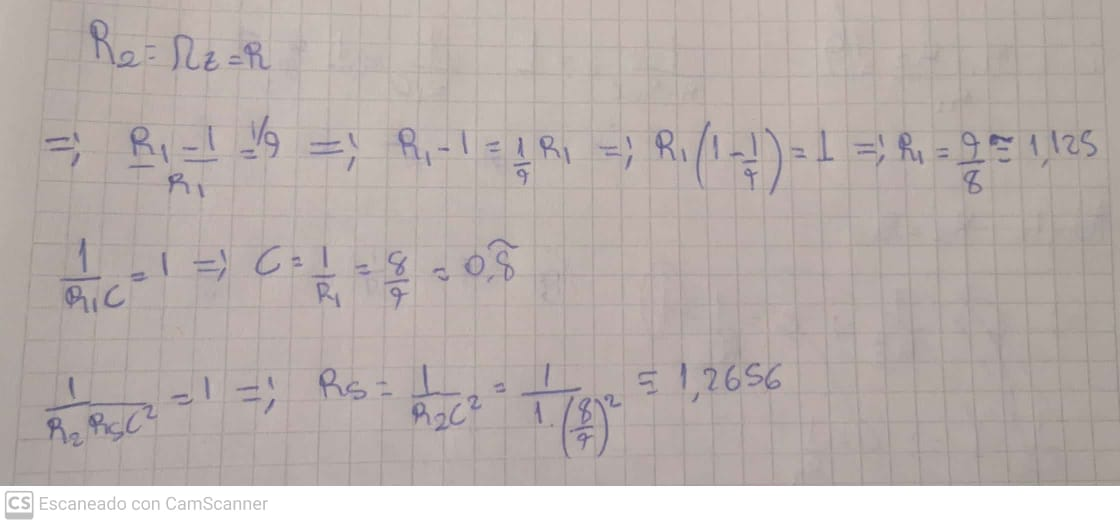
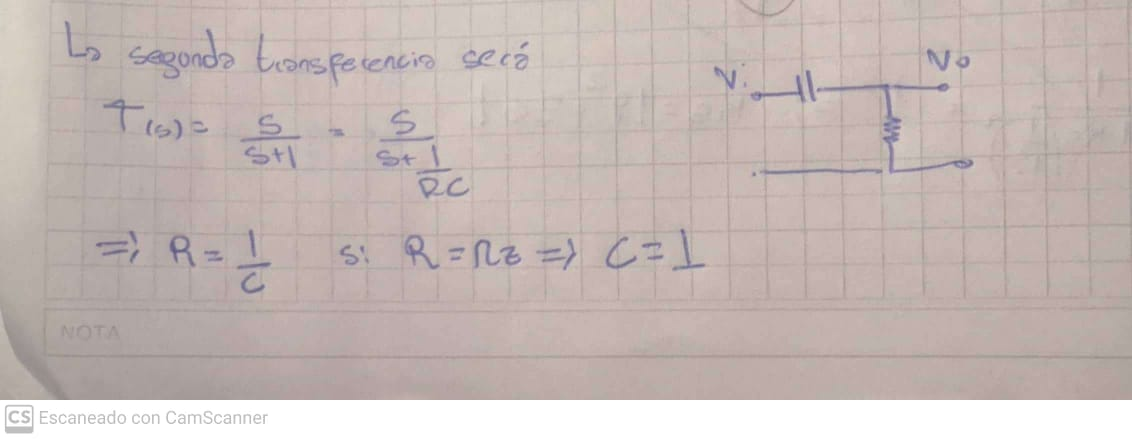



La simulacion circuital queda
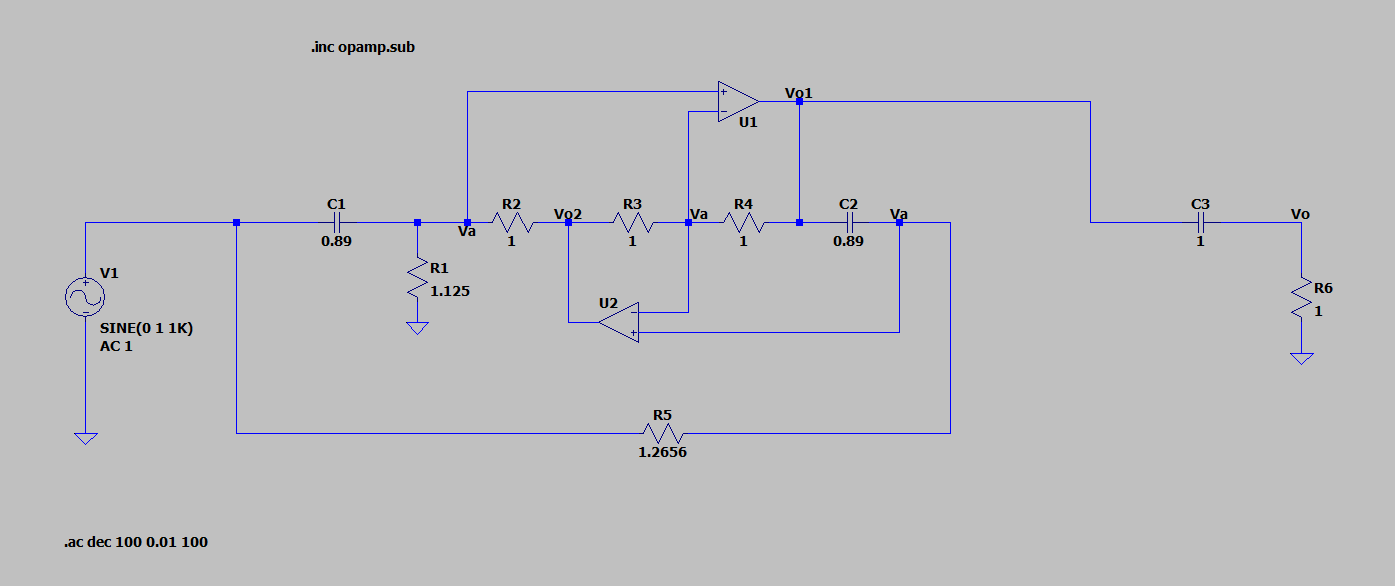
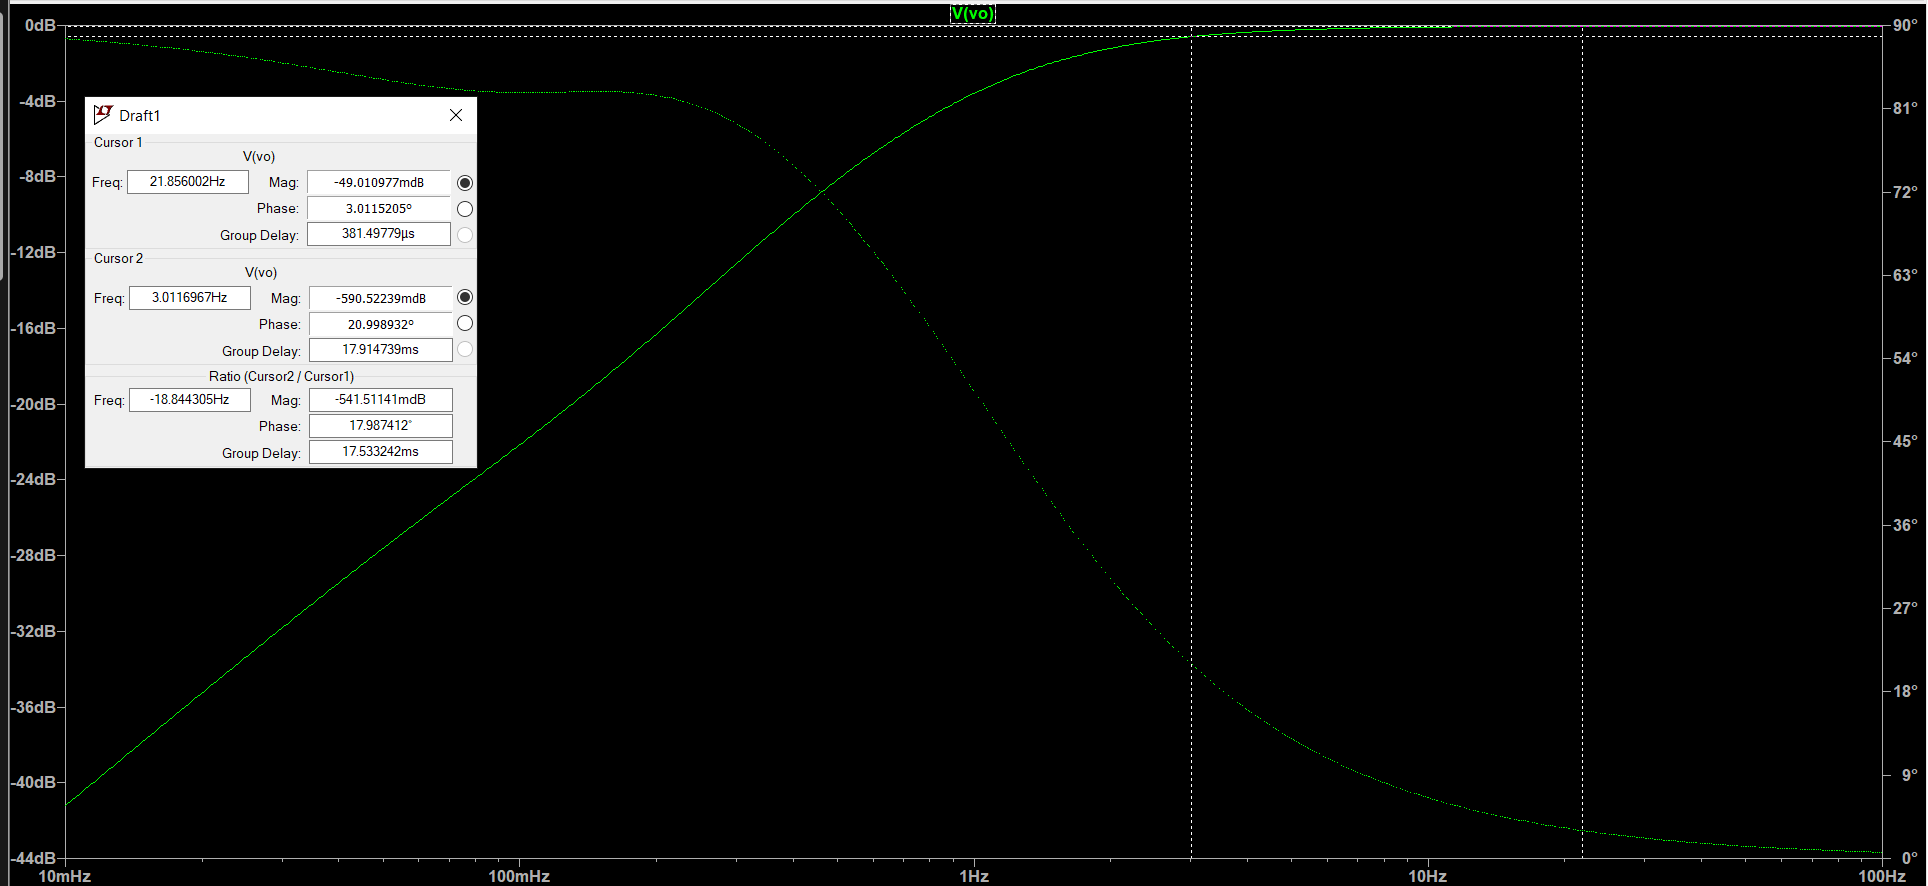

Por ultimo, comparare la estructura utilizada en este ejercicio con una propuesta en el Schaumann

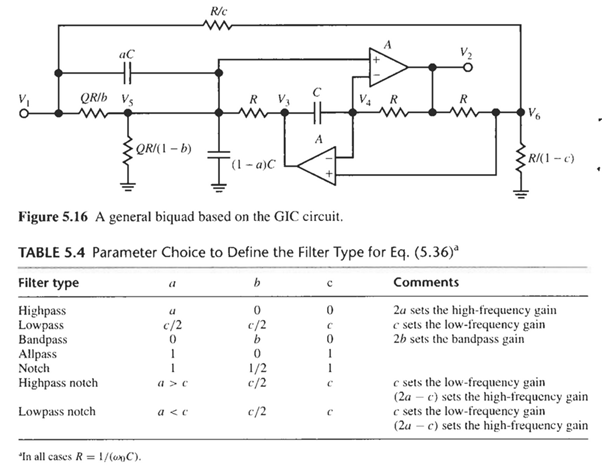

Cuya transferencia es 
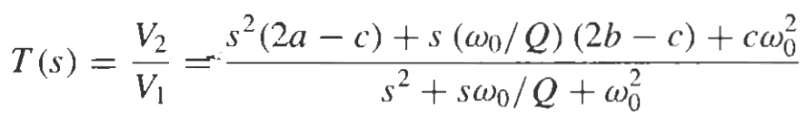

Podemos ver que ambas estrucutas son muy simalares. Ambas estan fuertamente basadas en el GIC. El ejercicio propuesto se podria haber resuelto con cualquiera de las dos estructuras. 
La principal diferencia es que este nueva estrura nos da mas libertades a la hora de diseñar y que ademas de los componentes tenemos los parametros a, b y c que nos dejan elegir que tipo de filtro queremos realizar. 
Esta estructura en especifico nos deja realizar cualquier tipo de filtro de segundo orden. La que utilizamos nosotros para este ejercicio no tiene esta capacidad. Solo nos deja realizar filtros notch y un pasaaltos en caso de que R1=R2. 
Otra es diferencia es que la estructura que propone Schaumann nos deja tener una K distinta a 0 (1/(2a-c)), cosa que el otro circuito no nos permitia 